C:\Users\dell\AppData\Local\Temp\ipykernel_9776\3018812868.py:36: RuntimeWarning: invalid value encountered in divide
  autocorr_result /= np.max(np.abs(autocorr_result))


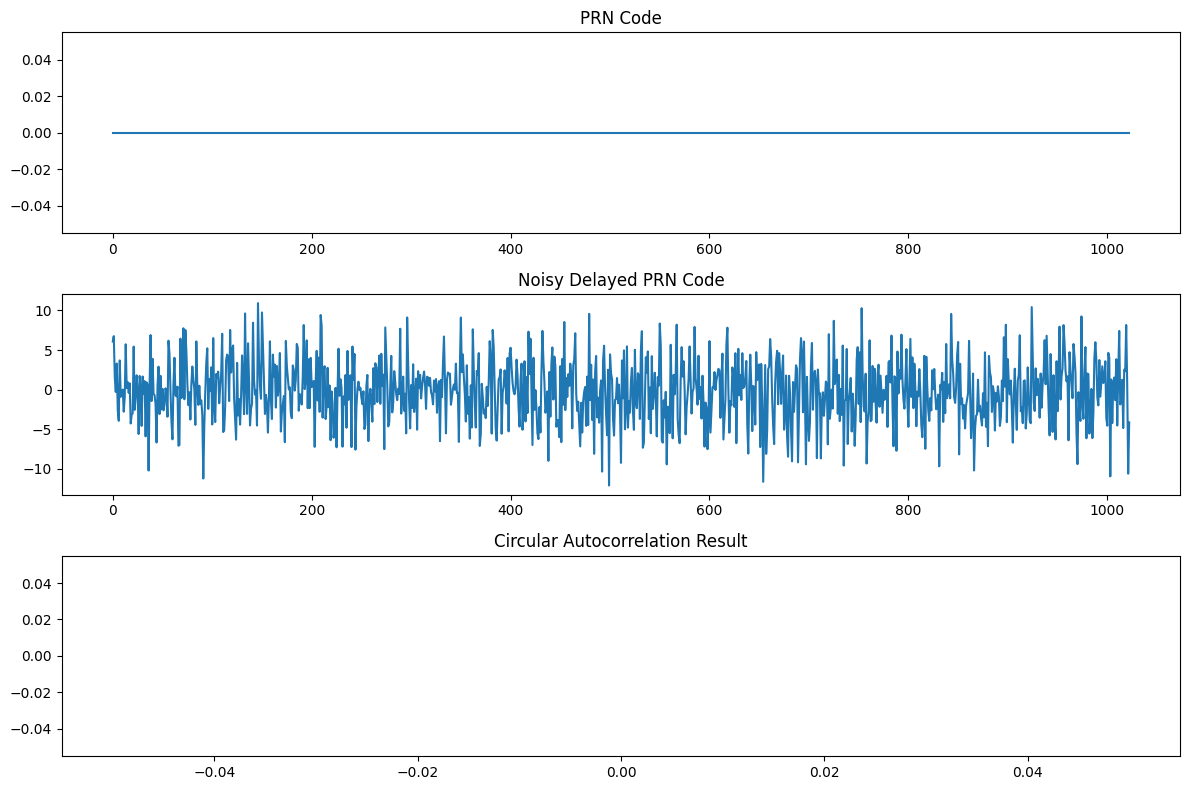

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate PRN code
def generate_prn_code(prn_number, length):
    prn = np.zeros(length, dtype=int)
    feedback_mask = [1, 8]  # MATLAB indexing starts from 1

    for i in range(1, length):
        feedback = np.bitwise_xor(int(prn[feedback_mask[0] - 1]), int(prn[feedback_mask[1] - 1]))
        prn = np.roll(prn, 1)
        prn[0] = feedback

    return prn

# Parameters
prn_number = 8
delay = 200
length = 1023
noise_std_dev = 4

# Generate PRN codes
prn_code = generate_prn_code(prn_number, length)
prn_code_delayed = np.roll(prn_code, delay)

# Generate white Gaussian noise
noise = np.random.normal(0, noise_std_dev, length)

# Add noise to the delayed PRN code
noisy_prn_code_delayed = prn_code_delayed + noise

# Compute circular autocorrelation
autocorr_result = np.fft.ifft(np.fft.fft(prn_code) * np.conj(np.fft.fft(noisy_prn_code_delayed)))

# Normalize the result for better comparison
autocorr_result /= np.max(np.abs(autocorr_result))

# Plot the results
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(prn_code)
plt.title('PRN Code')

plt.subplot(3, 1, 2)
plt.plot(noisy_prn_code_delayed)
plt.title('Noisy Delayed PRN Code')

plt.subplot(3, 1, 3)
plt.plot(np.abs(autocorr_result))
plt.title('Circular Autocorrelation Result')

plt.tight_layout()
plt.show()
